# Rigid/Affine + LDDMM Registration

In [1]:
import sys
sys.path.insert(0,'../') # add code directory to path
# import lddmm
import torch_lddmm
# import numpy
import numpy as np
# import nibabel for i/o
import nibabel as nib
# import matplotlib for display
import matplotlib.pyplot as plt

## Load images as numpy arrays - Human Brain MRI

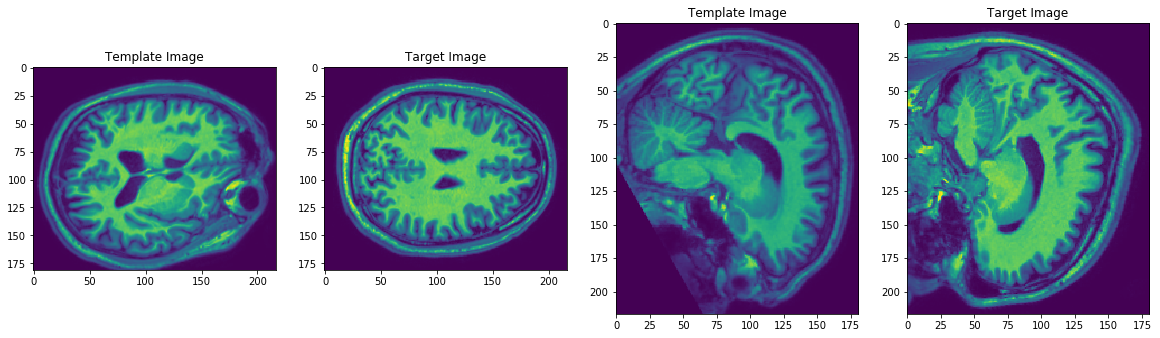

In [2]:
# set image file names
template_file_name = '../notebook/human_brain_affine.img'
target_file_name = '../notebook/Adt27-55_03_Adt27-55_03_MNI.img'

# load images
template_image_struct = nib.load(template_file_name)
target_image_struct = nib.load(target_file_name)

# set image spacing from template image, assume both images are the same spacing
dx = template_image_struct.header['pixdim'][1:4]

# get images as 3D numpy arrays
template_image = np.squeeze(template_image_struct.get_data()).astype(np.float32)
target_image = np.squeeze(target_image_struct.get_data()).astype(np.float32)

# draw a slice of each brain
plt.rcParams["figure.figsize"]=20,20
plt.figure()
plt.subplot(1,4,1)
plt.imshow(template_image[:,:,100])
plt.title('Template Image')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(template_image[105,:,:])
plt.title('Template Image')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## Initialize with rigid-only alignment

In [3]:
# create torch_lddmm object
# here, we manually set:
# do_affine = 1 (this indicates rigid, 2 indicates affine)
# do_lddmm = 0
lddmm = torch_lddmm.LDDMM(template=template_image,target=target_image,outdir='../notebook/',do_affine=2,do_lddmm=0,niter=750,epsilonL=2e-9,epsilonT=2e-10,sigma=20.0,optimizer='gdr',dx=dx)


Current parameters:
>    a               = 5.0 (smoothing kernel, a*(pixel_size))
>    p               = 2 (smoothing kernel power, p*2)
>    niter           = 750 (number of iterations)
>    epsilon         = 0.005 (gradient descent step size)
>    epsilonL        = 2e-09 (gradient descent step size, affine)
>    epsilonT        = 2e-10 (gradient descent step size, translation)
>    minbeta         = 0.0001 (smallest multiple of epsilon)
>    sigma           = 20.0 (matching term coefficient (0.5/sigma**2))
>    sigmaR          = 1.0 (regularization term coefficient (0.5/sigmaR**2))
>    nt              = 5 (number of time steps in velocity field)
>    do_lddmm        = 0 (perform LDDMM step, 0 = no, 1 = yes)
>    do_affine       = 2 (interleave linear registration: 0 = no, 1 = affine, 2 = rigid)
>    checkaffinestep = 0 (evaluate linear matching energy: 0 = no, 1 = yes)
>    im_norm_ms      = 0 (normalize image by mean and std: 0 = no, 1 = yes)
>    gpu_number      = 0 (index of CUD

In [4]:
# run computation
lddmm.run()

iter: 0, E = 30311928.0000, ER = 0.0000, EM = 30311928.0000, epd = 0.005000.
iter: 1, E= 29757636.000, ER= 0.000, EM= 29757636.000, epd= 0.005, time= 0.11s.
iter: 2, E= 29629528.000, ER= 0.000, EM= 29629528.000, epd= 0.005, time= 0.09s.
iter: 3, E= 29529578.000, ER= 0.000, EM= 29529578.000, epd= 0.005, time= 0.09s.
iter: 4, E= 29432860.000, ER= 0.000, EM= 29432860.000, epd= 0.005, time= 0.09s.
iter: 5, E= 29322020.000, ER= 0.000, EM= 29322020.000, epd= 0.005, time= 0.09s.
iter: 6, E= 29196944.000, ER= 0.000, EM= 29196944.000, epd= 0.005, time= 0.09s.
iter: 7, E= 29069780.000, ER= 0.000, EM= 29069780.000, epd= 0.005, time= 0.09s.
iter: 8, E= 28940280.000, ER= 0.000, EM= 28940280.000, epd= 0.005, time= 0.09s.
iter: 9, E= 28808744.000, ER= 0.000, EM= 28808744.000, epd= 0.005, time= 0.09s.
iter: 10, E= 28677908.000, ER= 0.000, EM= 28677908.000, epd= 0.005, time= 0.09s.
iter: 11, E= 28550038.000, ER= 0.000, EM= 28550038.000, epd= 0.005, time= 0.09s.
iter: 12, E= 28423252.000, ER= 0.000, EM=

iter: 101, E= 24436660.000, ER= 0.000, EM= 24436660.000, epd= 0.005, time= 0.09s.
iter: 102, E= 24427012.000, ER= 0.000, EM= 24427012.000, epd= 0.005, time= 0.09s.
iter: 103, E= 24417258.000, ER= 0.000, EM= 24417258.000, epd= 0.005, time= 0.09s.
iter: 104, E= 24407380.000, ER= 0.000, EM= 24407380.000, epd= 0.005, time= 0.09s.
iter: 105, E= 24397394.000, ER= 0.000, EM= 24397394.000, epd= 0.005, time= 0.09s.
iter: 106, E= 24387292.000, ER= 0.000, EM= 24387292.000, epd= 0.005, time= 0.09s.
iter: 107, E= 24377070.000, ER= 0.000, EM= 24377070.000, epd= 0.005, time= 0.09s.
iter: 108, E= 24366732.000, ER= 0.000, EM= 24366732.000, epd= 0.005, time= 0.09s.
iter: 109, E= 24356286.000, ER= 0.000, EM= 24356286.000, epd= 0.005, time= 0.09s.
iter: 110, E= 24345724.000, ER= 0.000, EM= 24345724.000, epd= 0.005, time= 0.09s.
iter: 111, E= 24335052.000, ER= 0.000, EM= 24335052.000, epd= 0.005, time= 0.09s.
iter: 112, E= 24324260.000, ER= 0.000, EM= 24324260.000, epd= 0.005, time= 0.09s.
iter: 113, E= 24

iter: 203, E= 22760076.000, ER= 0.000, EM= 22760076.000, epd= 0.005, time= 0.09s.
iter: 204, E= 22734750.000, ER= 0.000, EM= 22734750.000, epd= 0.005, time= 0.09s.
iter: 205, E= 22709184.000, ER= 0.000, EM= 22709184.000, epd= 0.005, time= 0.09s.
iter: 206, E= 22683358.000, ER= 0.000, EM= 22683358.000, epd= 0.005, time= 0.09s.
iter: 207, E= 22657310.000, ER= 0.000, EM= 22657310.000, epd= 0.005, time= 0.09s.
iter: 208, E= 22631074.000, ER= 0.000, EM= 22631074.000, epd= 0.005, time= 0.09s.
iter: 209, E= 22604628.000, ER= 0.000, EM= 22604628.000, epd= 0.005, time= 0.09s.
iter: 210, E= 22577992.000, ER= 0.000, EM= 22577992.000, epd= 0.005, time= 0.09s.
iter: 211, E= 22551172.000, ER= 0.000, EM= 22551172.000, epd= 0.005, time= 0.09s.
iter: 212, E= 22524154.000, ER= 0.000, EM= 22524154.000, epd= 0.005, time= 0.09s.
iter: 213, E= 22496902.000, ER= 0.000, EM= 22496902.000, epd= 0.005, time= 0.09s.
iter: 214, E= 22469430.000, ER= 0.000, EM= 22469430.000, epd= 0.005, time= 0.09s.
iter: 215, E= 22

iter: 305, E= 19113498.000, ER= 0.000, EM= 19113498.000, epd= 0.005, time= 0.09s.
iter: 306, E= 19065334.000, ER= 0.000, EM= 19065334.000, epd= 0.005, time= 0.09s.
iter: 307, E= 19016846.000, ER= 0.000, EM= 19016846.000, epd= 0.005, time= 0.09s.
iter: 308, E= 18968076.000, ER= 0.000, EM= 18968076.000, epd= 0.005, time= 0.09s.
iter: 309, E= 18919024.000, ER= 0.000, EM= 18919024.000, epd= 0.005, time= 0.09s.
iter: 310, E= 18869636.000, ER= 0.000, EM= 18869636.000, epd= 0.005, time= 0.09s.
iter: 311, E= 18819856.000, ER= 0.000, EM= 18819856.000, epd= 0.005, time= 0.09s.
iter: 312, E= 18769798.000, ER= 0.000, EM= 18769798.000, epd= 0.005, time= 0.10s.
iter: 313, E= 18719472.000, ER= 0.000, EM= 18719472.000, epd= 0.005, time= 0.09s.
iter: 314, E= 18668820.000, ER= 0.000, EM= 18668820.000, epd= 0.005, time= 0.09s.
iter: 315, E= 18617828.000, ER= 0.000, EM= 18617828.000, epd= 0.005, time= 0.09s.
iter: 316, E= 18566472.000, ER= 0.000, EM= 18566472.000, epd= 0.005, time= 0.09s.
iter: 317, E= 18

iter: 407, E= 13470939.000, ER= 0.000, EM= 13470939.000, epd= 0.005, time= 0.09s.
iter: 408, E= 13435302.000, ER= 0.000, EM= 13435302.000, epd= 0.005, time= 0.09s.
iter: 409, E= 13400590.000, ER= 0.000, EM= 13400590.000, epd= 0.005, time= 0.09s.
iter: 410, E= 13366846.000, ER= 0.000, EM= 13366846.000, epd= 0.005, time= 0.09s.
iter: 411, E= 13334054.000, ER= 0.000, EM= 13334054.000, epd= 0.005, time= 0.09s.
iter: 412, E= 13302219.000, ER= 0.000, EM= 13302219.000, epd= 0.005, time= 0.09s.
iter: 413, E= 13271346.000, ER= 0.000, EM= 13271346.000, epd= 0.005, time= 0.09s.
iter: 414, E= 13241441.000, ER= 0.000, EM= 13241441.000, epd= 0.005, time= 0.09s.
iter: 415, E= 13212476.000, ER= 0.000, EM= 13212476.000, epd= 0.005, time= 0.09s.
iter: 416, E= 13184445.000, ER= 0.000, EM= 13184445.000, epd= 0.005, time= 0.09s.
iter: 417, E= 13157401.000, ER= 0.000, EM= 13157401.000, epd= 0.005, time= 0.09s.
iter: 418, E= 13131316.000, ER= 0.000, EM= 13131316.000, epd= 0.005, time= 0.09s.
iter: 419, E= 13

## display result of rigid-only alignment

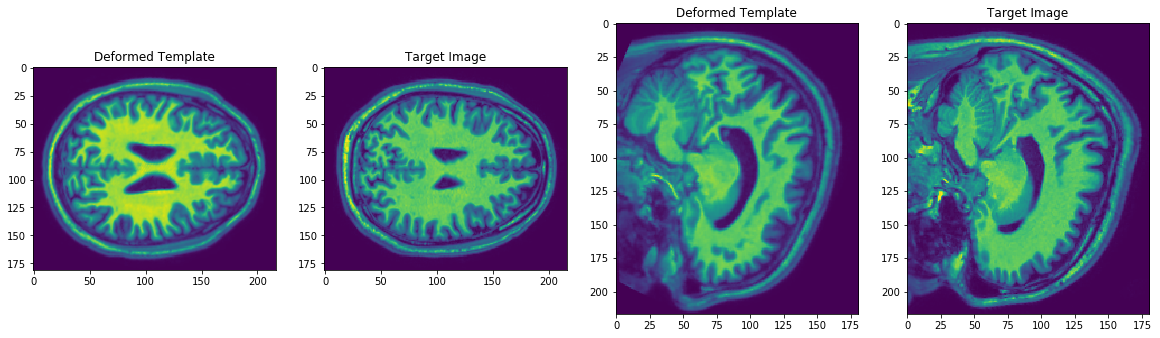

In [5]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## continue optimization from current state with affine-only alignment

In [7]:
# affine-only alignment
lddmm.setParams('do_affine',1)
lddmm.setParams('niter',200)
lddmm.setParams('epsilonL',lddmm.GDBetaAffineR*lddmm.params['epsilonL']) # reduce step size, here we set it to the current size
lddmm.setParams('epsilonT',lddmm.GDBetaAffineT*lddmm.params['epsilonT']) # reduce step size, here we set it to the current size
lddmm.run()

Parameter 'do_affine' changed to '1'.
Parameter 'niter' changed to '200'.
Parameter 'epsilonL' changed to '1.877496067529548e-13'.
Parameter 'epsilonT' changed to '1.8774960675295478e-14'.
iter: 0, E = 12722790.0000, ER = 0.0000, EM = 12722790.0000, epd = 0.005000.
iter: 1, E= 12722563.000, ER= 0.000, EM= 12722563.000, epd= 0.005, time= 0.09s.
iter: 2, E= 12722346.000, ER= 0.000, EM= 12722346.000, epd= 0.005, time= 0.09s.
iter: 3, E= 12722121.000, ER= 0.000, EM= 12722121.000, epd= 0.005, time= 0.09s.
iter: 4, E= 12721901.000, ER= 0.000, EM= 12721901.000, epd= 0.005, time= 0.09s.
iter: 5, E= 12721678.000, ER= 0.000, EM= 12721678.000, epd= 0.005, time= 0.09s.
iter: 6, E= 12721454.000, ER= 0.000, EM= 12721454.000, epd= 0.005, time= 0.09s.
iter: 7, E= 12721232.000, ER= 0.000, EM= 12721232.000, epd= 0.005, time= 0.09s.
iter: 8, E= 12721013.000, ER= 0.000, EM= 12721013.000, epd= 0.005, time= 0.09s.
iter: 9, E= 12720785.000, ER= 0.000, EM= 12720785.000, epd= 0.005, time= 0.09s.
iter: 10, E= 1

iter: 99, E= 12700760.000, ER= 0.000, EM= 12700760.000, epd= 0.005, time= 0.09s.
iter: 100, E= 12700534.000, ER= 0.000, EM= 12700534.000, epd= 0.005, time= 0.09s.
iter: 101, E= 12700316.000, ER= 0.000, EM= 12700316.000, epd= 0.005, time= 0.09s.
iter: 102, E= 12700092.000, ER= 0.000, EM= 12700092.000, epd= 0.005, time= 0.09s.
iter: 103, E= 12699872.000, ER= 0.000, EM= 12699872.000, epd= 0.005, time= 0.09s.
iter: 104, E= 12699653.000, ER= 0.000, EM= 12699653.000, epd= 0.005, time= 0.09s.
iter: 105, E= 12699428.000, ER= 0.000, EM= 12699428.000, epd= 0.005, time= 0.09s.
iter: 106, E= 12699204.000, ER= 0.000, EM= 12699204.000, epd= 0.005, time= 0.09s.
iter: 107, E= 12698985.000, ER= 0.000, EM= 12698985.000, epd= 0.005, time= 0.09s.
iter: 108, E= 12698763.000, ER= 0.000, EM= 12698763.000, epd= 0.005, time= 0.09s.
iter: 109, E= 12698541.000, ER= 0.000, EM= 12698541.000, epd= 0.005, time= 0.09s.
iter: 110, E= 12698318.000, ER= 0.000, EM= 12698318.000, epd= 0.005, time= 0.09s.
iter: 111, E= 126

## display result of rigid-only + affine-only alignment

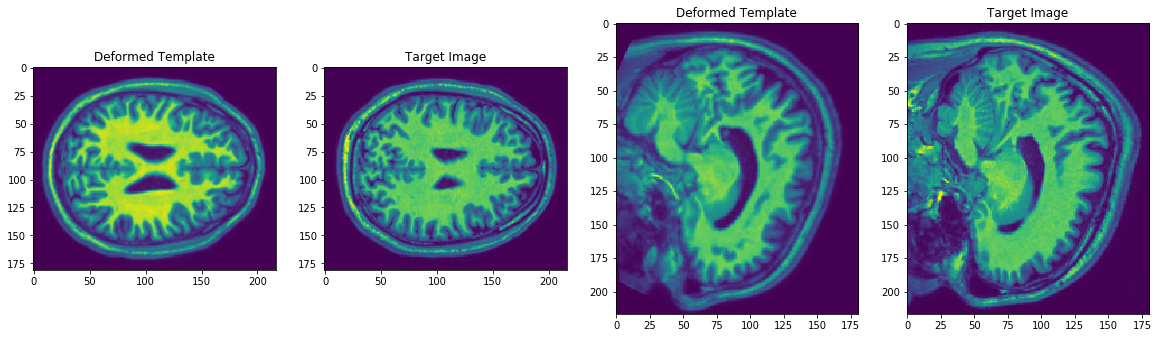

In [8]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## continue optimization with tandem lddmm and affine registration

In [9]:
lddmm.setParams('do_lddmm',1) # do_affine is still 1, so we will optimize both affine and diffeo simultaneously
lddmm.setParams('niter',200)
lddmm.setParams('a',7)
lddmm.setParams('epsilon',4e0)
lddmm.setParams('sigmaR',40.0)
lddmm.setParams('epsilonL',lddmm.GDBetaAffineR*lddmm.params['epsilonL']) # reduce step size, here we set it to the current size
lddmm.setParams('epsilonT',lddmm.GDBetaAffineT*lddmm.params['epsilonT']) # reduce step size, here we set it to the current size
lddmm.run()

Parameter 'do_lddmm' changed to '1'.
Parameter 'niter' changed to '200'.
Parameter 'a' changed to '7'.
Parameter 'epsilon' changed to '4.0'.
Parameter 'sigmaR' changed to '40.0'.
Parameter 'epsilonL' changed to '1.877496067529548e-13'.
Parameter 'epsilonT' changed to '1.8774960675295478e-14'.
iter: 0, E = 12678690.0000, ER = 0.0000, EM = 12678690.0000, epd = 4.000000.
iter: 1, E= 10566015.000, ER= 4151.208, EM= 10561864.000, epd= 4.000, time= 0.96s.
iter: 2, E= 9627343.000, ER= 6636.409, EM= 9620707.000, epd= 4.000, time= 0.99s.
iter: 3, E= 9209762.000, ER= 10795.856, EM= 9198966.000, epd= 4.000, time= 0.99s.
iter: 4, E= 8946847.000, ER= 12679.266, EM= 8934168.000, epd= 4.000, time= 0.99s.
iter: 5, E= 8802011.000, ER= 17179.566, EM= 8784831.000, epd= 4.000, time= 0.99s.
iter: 6, E= 8673722.000, ER= 18136.344, EM= 8655586.000, epd= 4.000, time= 0.99s.
iter: 7, E= 8628473.000, ER= 22950.596, EM= 8605522.000, epd= 4.000, time= 0.99s.
iter: 8, E= 8531937.000, ER= 23149.527, EM= 8508787.000

iter: 93, E= 6600301.500, ER= 172534.109, EM= 6427767.500, epd= 2.800, time= 0.99s.
iter: 94, E= 6594255.000, ER= 174400.703, EM= 6419854.500, epd= 2.800, time= 0.99s.
iter: 95, E= 6588304.000, ER= 176272.078, EM= 6412032.000, epd= 2.800, time= 0.99s.
iter: 96, E= 6582443.000, ER= 178148.094, EM= 6404295.000, epd= 2.800, time= 0.99s.
iter: 97, E= 6576671.000, ER= 180028.938, EM= 6396642.000, epd= 2.800, time= 0.99s.
iter: 98, E= 6570984.500, ER= 181914.609, EM= 6389070.000, epd= 2.800, time= 0.99s.
iter: 99, E= 6565386.500, ER= 183805.031, EM= 6381581.500, epd= 2.800, time= 0.99s.
iter: 100, E= 6559878.000, ER= 185700.312, EM= 6374177.500, epd= 2.800, time= 0.99s.
iter: 101, E= 6554450.500, ER= 187600.359, EM= 6366850.000, epd= 2.800, time= 0.99s.
iter: 102, E= 6549102.000, ER= 189505.141, EM= 6359597.000, epd= 2.800, time= 0.99s.
iter: 103, E= 6543834.500, ER= 191414.625, EM= 6352420.000, epd= 2.800, time= 0.99s.
iter: 104, E= 6538647.500, ER= 193328.656, EM= 6345319.000, epd= 2.800, 

iter: 190, E= 6303628.500, ER= 374364.188, EM= 5929264.500, epd= 2.800, time= 0.99s.
iter: 191, E= 6302609.500, ER= 376611.531, EM= 5925998.000, epd= 2.800, time= 0.99s.
iter: 192, E= 6301611.500, ER= 378860.406, EM= 5922751.000, epd= 2.800, time= 0.99s.
iter: 193, E= 6300640.500, ER= 381111.000, EM= 5919529.500, epd= 2.800, time= 0.99s.
iter: 194, E= 6299696.000, ER= 383363.062, EM= 5916333.000, epd= 2.800, time= 0.99s.
iter: 195, E= 6298774.500, ER= 385616.125, EM= 5913158.500, epd= 2.800, time= 0.99s.
iter: 196, E= 6297873.000, ER= 387870.250, EM= 5910003.000, epd= 2.800, time= 0.99s.
iter: 197, E= 6296992.500, ER= 390125.500, EM= 5906867.000, epd= 2.800, time= 0.99s.
iter: 198, E= 6296134.000, ER= 392381.312, EM= 5903752.500, epd= 2.800, time= 0.99s.
iter: 199, E= 6295293.500, ER= 394637.469, EM= 5900656.000, epd= 2.800, time= 0.99s.
Total elapsed runtime: 197.18 seconds.


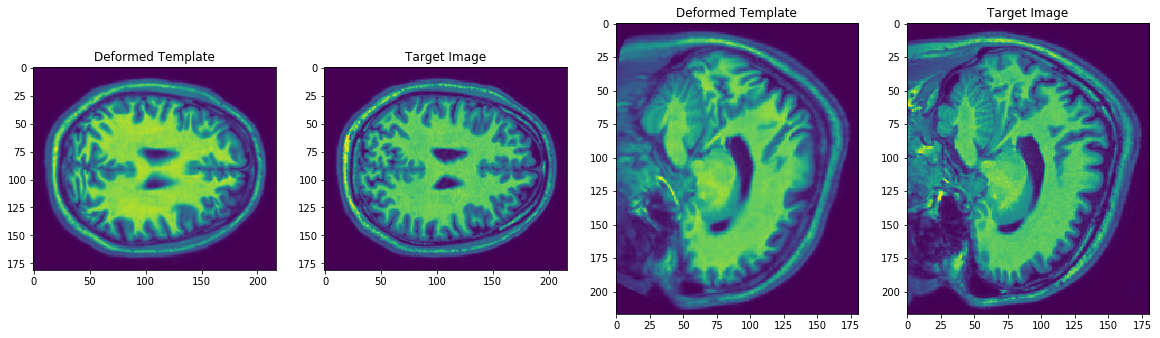

In [10]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

## finally, do LDDMM only

In [17]:
lddmm.setParams('do_affine',0) # do_lddmm is still 1
lddmm.setParams('niter',150)
lddmm.setParams('a',7)
lddmm.setParams('epsilon',float(lddmm.params['epsilon']*lddmm.GDBeta.cpu().numpy()))
lddmm.run()

Parameter 'do_affine' changed to '0'.
Parameter 'niter' changed to '150'.
Parameter 'a' changed to '7'.
Parameter 'epsilon' changed to '1.371999979019165'.
iter: 0, E = 6295293.5000, ER = 394637.4688, EM = 5900656.0000, epd = 1.372000.
iter: 1, E= 6294890.000, ER= 395742.219, EM= 5899148.000, epd= 1.372, time= 0.93s.
iter: 2, E= 6294492.500, ER= 396846.688, EM= 5897646.000, epd= 1.372, time= 0.93s.
iter: 3, E= 6294100.500, ER= 397951.469, EM= 5896149.000, epd= 1.372, time= 0.93s.
iter: 4, E= 6293712.500, ER= 399056.125, EM= 5894656.500, epd= 1.372, time= 0.93s.
iter: 5, E= 6293331.000, ER= 400160.812, EM= 5893170.000, epd= 1.372, time= 0.93s.
iter: 6, E= 6292953.000, ER= 401265.344, EM= 5891687.500, epd= 1.372, time= 0.93s.
iter: 7, E= 6292581.000, ER= 402369.781, EM= 5890211.000, epd= 1.372, time= 0.93s.
iter: 8, E= 6292214.000, ER= 403474.094, EM= 5888740.000, epd= 1.372, time= 0.93s.
iter: 9, E= 6291850.500, ER= 404578.500, EM= 5887272.000, epd= 1.372, time= 0.93s.
iter: 10, E= 6291

iter: 96, E= 6275633.500, ER= 495753.625, EM= 5779880.000, epd= 0.161, time= 0.93s.
iter: 97, E= 6275630.500, ER= 495844.281, EM= 5779786.000, epd= 0.113, time= 0.93s.
iter: 98, E= 6275629.000, ER= 495908.406, EM= 5779720.500, epd= 0.079, time= 0.93s.
iter: 99, E= 6275628.000, ER= 495953.594, EM= 5779674.500, epd= 0.055, time= 0.93s.
iter: 100, E= 6275627.500, ER= 495985.594, EM= 5779642.000, epd= 0.039, time= 0.93s.
iter: 101, E= 6275628.000, ER= 496008.406, EM= 5779619.500, epd= 0.027, time= 0.93s.
iter: 102, E= 6275628.000, ER= 496024.625, EM= 5779603.500, epd= 0.019, time= 0.93s.
iter: 103, E= 6275629.000, ER= 496036.250, EM= 5779593.000, epd= 0.013, time= 0.93s.
iter: 104, E= 6275630.000, ER= 496044.906, EM= 5779585.000, epd= 0.009, time= 0.93s.
iter: 105, E= 6275631.000, ER= 496051.406, EM= 5779579.500, epd= 0.007, time= 0.93s.
iter: 106, E= 6275632.000, ER= 496056.188, EM= 5779576.000, epd= 0.005, time= 0.93s.
iter: 107, E= 6275633.000, ER= 496060.062, EM= 5779573.000, epd= 0.00

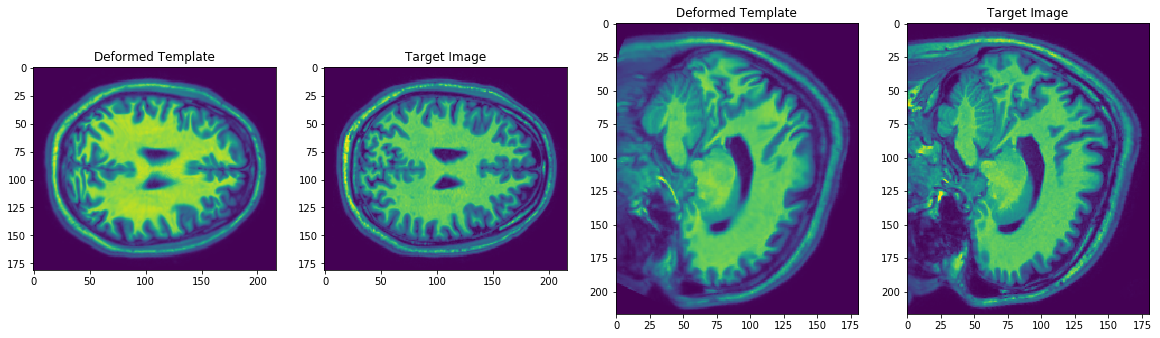

In [18]:
# display the deformed template according to the current transform
(deformed_template,_,_,_) = lddmm.applyThisTransform(template_image)
deformed_template = deformed_template[-1].cpu().numpy()
plt.figure()
plt.subplot(1,4,1)
plt.imshow(deformed_template[:,:,100])
plt.title('Deformed Template')
plt.subplot(1,4,2)
plt.imshow(target_image[:,:,100])
plt.title('Target Image')
plt.subplot(1,4,3)
plt.imshow(deformed_template[105,:,:])
plt.title('Deformed Template')
plt.subplot(1,4,4)
plt.imshow(target_image[105,:,:])
plt.title('Target Image')
plt.show()

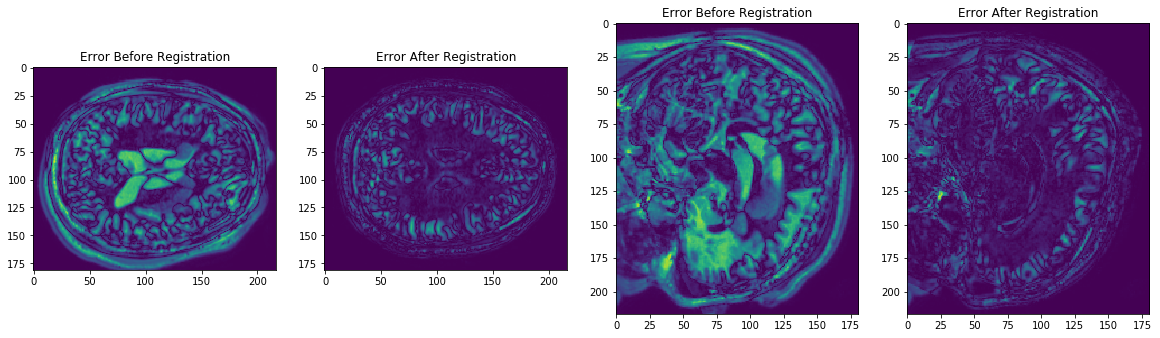

In [19]:
# display intensity difference before and after mapping
diffimg_before = np.abs(template_image-target_image)
diffimg_after = np.abs(deformed_template-target_image)
plt.figure()
plt.subplot(1,4,1)
plt.imshow(diffimg_before[:,:,100],vmin=0,vmax=255)
plt.title('Error Before Registration')
plt.subplot(1,4,2)
plt.imshow(diffimg_after[:,:,100],vmin=0,vmax=255)
plt.title('Error After Registration')
plt.subplot(1,4,3)
plt.imshow(diffimg_before[105,:,:],vmin=0,vmax=255)
plt.title('Error Before Registration')
plt.subplot(1,4,4)
plt.imshow(diffimg_after[105,:,:],vmin=0,vmax=255)
plt.title('Error After Registration')
plt.show()

In [20]:
# output transforms
(vt0,vt1,vt2,A) = lddmm.outputTransforms() # output LDDMM and linear transforms
(phi0,phi1,phi2) = lddmm.computeThisDisplacement() # output resultant displacement field
deformed_template = lddmm.outputDeformedTemplate() # output deformed template as numpy array

# clear memory (the LDDMM object still exists and consumes some GPU memory but transforms are deleted)
lddmm.delete()